# BASICS OF PYTHON | SESSION 5

---
Sina Shafiezadeh | April 2023
---


Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Send your public repository** to me by email (sina.shafiezadeh@studenti.unipd.it).


# 1.&nbsp;Data Importing

In [ ]:
#Importing data.csv as pandas

import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.info()

# 2.&nbsp;Data Cleaning (overview)

In [ ]:
# We want to know if there is a correlation between danceability and duration grouped by target

#first, select only the data we want to use for this analysis

data = data.loc[:, ['danceability', 'duration_ms', 'target']]

#now we clean the duration data from milliseconds to minutes

data['duration'] = data['duration_ms']/60000

#so now we can remove the unnecessary duration_ms column

data.drop(['duration_ms'], axis=1, inplace=True)


# 3.&nbsp;Data Cleaning (interpretability)

In [ ]:
#We check everything is ok and go on with the code
print(data['duration'].describe())
print(data['danceability'].describe())
print(data['target'].describe())





In [ ]:
#There are some songs with duration less than 1 minute
#Investigate about it

print(sorted_data = data['duration'].sort_values(ascending=True))
print(sorted_data = data['duration'].sort_values(ascending=False))
print(sorted_data.head(50))

In [ ]:
#There are 2 songs with less then 0.5 minutes duration
#These maybe can be considerated as noisy data for this kind of analysis
#Se let's try to remove it in the next code


# 4.&nbsp;Data Cleaning (reduction)

In [ ]:
#Check which row has the odd duration
sorted_data

#drop them manually
data.drop([1044, 1436], inplace=True)

#Call a new sorted data
sorted_data_new = data['duration'].sort_values(ascending=True)

In [ ]:
#Verify that our new data are correctly saved in data file

print(sorted_data_new)
print(data)

# 5.&nbsp;Data Cleaning (noisy data)

# 6.&nbsp;Data Cleaning (completeness)

# 7.&nbsp;Data Exploring


In [143]:
#We want to check if for a different target there is a correlation between
#duration and danceability

#So first, see the correlation between our data
data.corr()

,danceability,target,duration
danceability,1.000000,0.175780,0.001572
target,0.175780,1.000000,0.144571
duration,0.001572,0.144571,1.000000


In [142]:
#See correlation between danceability and duration not considering target
data_DD = data['danceability'].corr(data['duration'])
data_DD

0.0015716089648736592

In [144]:
#Now we can group by target
#We get the mean of duration and danceability for group 0 and group 1
data_group = data.groupby(['target']).mean()
data_group


,danceability,duration
target,,
0,0.589954,3.909639
1,0.646547,4.303293


# 8.&nbsp;Data Analysis

In [94]:
#We begin with the analysis
#First of all we import the statistic we need for

from scipy.stats import f_oneway

In [139]:
data.to_numpy()

array([[0.833     , 1.        , 3.41      ],
       [0.743     , 1.        , 5.44888333],
       [0.838     , 1.        , 3.09511667],
       ...,
       [0.637     , 0.        , 3.45333333],
       [0.557     , 0.        , 3.09333333],
       [0.446     , 0.        , 3.40866667]])

In [135]:
from scipy.stats import f_oneway

#I'm creating the groups for the analysis
data_group1 = np.array([data[data['target'] == "1"]['danceability']])
data_group2 = np.array([data[data['target'] == "0"]['danceability']])
data_group3 = np.array([data[data['target'] == "1"]['duration']])
data_group4 = np.array([data[data['target'] == "0"]['duration']])



f_oneway(data_group1, data_group2, data_group3, data_group4)


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:3869: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


F_onewayResult(statistic=array([], dtype=float64), pvalue=array([], dtype=float64))

In [141]:
print(data[data['target'] == "1"]['danceability'])

Series([], Name: danceability, dtype: float64)


In [140]:
data['danceability']

0       0.833
1       0.743
2       0.838
3       0.494
4       0.678
        ...  
2012    0.584
2013    0.894
2014    0.637
2015    0.557
2016    0.446
Name: danceability, Length: 2015, dtype: float64

# 9.&nbsp;Data Visualization

In [ ]:
import matplotlib.pyplot as mpt
dance_target = data.groupby(['target']).mean()['danceability']

print(dance_target)

target = ["0","1"]
dance = dance_target.tolist()
fig = mpt.figure(figsize = (5, 2.5))

mpt.bar(target, dance, color="green", width=0.8)

mpt.xlabel("target")
mpt.ylabel("dance")
mpt.title("average dance per target")
mpt.show()

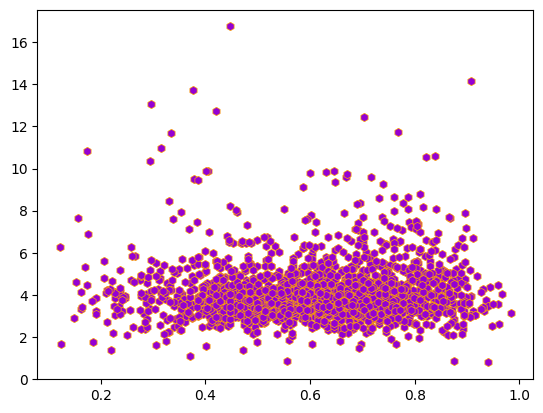

In [148]:
x = data['danceability']
y = data['duration']

mpt.scatter(x, y, c="darkviolet", marker = "h", linewidths = 0.5, edgecolors = "orange", )


# 10.&nbsp;Data Exporting

In [149]:
data.to_csv('cleaned_data_exam.csv', header=True, index=True)